https://ysyblog.tistory.com/119

In [1]:
import pandas as pd
import numpy as np

# p-value and vif check
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

C:\Users\dltmf\anaconda3\envs\pycaret\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
dataset = pd.read_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_gender_longform_0805_test2.csv', encoding='cp949')
female  = dataset[dataset.sex == 2]
male    = dataset[dataset.sex == 1]

display(female.head())
display(male.head())

,area,tma,yyyy,mm,dd,weekday,sum_gsr,sum_rn,avg_ps,max_ps,...,diff_hum,min_temp,max_temp,avg_temp,diff_temp,pm10_3b,pm10_7b,pm10_31b,sex,frequency
1,강원,2012-01-01,2012,1,1,6,0.0,0.173611,1023.886667,1026.533333,...,65.0,-7.300000,5.0,-2.344048,12.300000,87.662500,30.158333,15.678261,2,3.0
3,강원,2012-01-02,2012,1,2,0,0.0,0.050000,1026.620000,1029.166667,...,68.0,-12.600000,4.0,-3.409048,16.600000,70.629167,34.325889,16.787500,2,0.0
5,강원,2012-01-03,2012,1,3,1,0.0,0.027778,1021.546667,1025.766667,...,72.0,-13.000000,5.0,-4.009383,18.000000,89.595833,54.223703,9.787500,2,0.0
7,강원,2012-01-04,2012,1,4,2,0.0,0.000000,1024.880000,1028.520000,...,70.0,-15.200000,3.0,-6.007792,18.200000,86.279167,73.445833,34.941667,2,2.0
9,강원,2012-01-05,2012,1,5,3,0.0,0.007042,1029.871429,1031.500000,...,78.0,-17.200001,4.0,-6.291558,21.200001,70.744444,87.662500,44.916667,2,1.0


,area,tma,yyyy,mm,dd,weekday,sum_gsr,sum_rn,avg_ps,max_ps,...,diff_hum,min_temp,max_temp,avg_temp,diff_temp,pm10_3b,pm10_7b,pm10_31b,sex,frequency
0,강원,2012-01-01,2012,1,1,6,0.0,0.173611,1023.886667,1026.533333,...,65.0,-7.300000,5.0,-2.344048,12.300000,87.662500,30.158333,15.678261,1,3.0
2,강원,2012-01-02,2012,1,2,0,0.0,0.050000,1026.620000,1029.166667,...,68.0,-12.600000,4.0,-3.409048,16.600000,70.629167,34.325889,16.787500,1,2.0
4,강원,2012-01-03,2012,1,3,1,0.0,0.027778,1021.546667,1025.766667,...,72.0,-13.000000,5.0,-4.009383,18.000000,89.595833,54.223703,9.787500,1,0.0
6,강원,2012-01-04,2012,1,4,2,0.0,0.000000,1024.880000,1028.520000,...,70.0,-15.200000,3.0,-6.007792,18.200000,86.279167,73.445833,34.941667,1,1.0
8,강원,2012-01-05,2012,1,5,3,0.0,0.007042,1029.871429,1031.500000,...,78.0,-17.200001,4.0,-6.291558,21.200001,70.744444,87.662500,44.916667,1,2.0


In [30]:
dataset.yyyy.unique()

array([2012, 2013, 2014, 2015], dtype=int64)

In [17]:
X = dataset.drop(['tma','D/R','frequency'], axis=1)
y = dataset['frequency']

# bias를 위한 상수항 추가
X_data = sm.add_constant(X, has_constant = "add")
X_data

,const,area,yyyy,mm,dd,weekday,sum_gsr,sum_rn,avg_ps,max_ps,...,avg_hum,diff_hum,min_temp,max_temp,avg_temp,diff_temp,pm10_3b,pm10_7b,pm10_31b,sex
0,1.0,강원,2012,1,1,6,0.0,0.173611,1023.886667,1026.533333,...,58.333333,65.0,-7.3,5.0,-2.344048,12.3,87.662500,30.158333,15.678261,1
1,1.0,강원,2012,1,1,6,0.0,0.173611,1023.886667,1026.533333,...,58.333333,65.0,-7.3,5.0,-2.344048,12.3,87.662500,30.158333,15.678261,2
2,1.0,강원,2012,1,2,0,0.0,0.050000,1026.620000,1029.166667,...,60.490476,68.0,-12.6,4.0,-3.409048,16.6,70.629167,34.325889,16.787500,1
3,1.0,강원,2012,1,2,0,0.0,0.050000,1026.620000,1029.166667,...,60.490476,68.0,-12.6,4.0,-3.409048,16.6,70.629167,34.325889,16.787500,2
4,1.0,강원,2012,1,3,1,0.0,0.027778,1021.546667,1025.766667,...,59.992131,72.0,-13.0,5.0,-4.009383,18.0,89.595833,54.223703,9.787500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49669,1.0,충북,2015,12,29,1,0.0,0.000000,656.200000,751.775000,...,62.439189,60.0,-14.0,4.0,-2.886486,18.0,84.616667,53.163258,44.287500,2
49670,1.0,충북,2015,12,30,2,0.0,0.919231,1030.200000,1033.800000,...,70.440315,54.0,-10.0,5.3,-0.944369,15.3,43.112500,48.222283,54.106250,1
49671,1.0,충북,2015,12,30,2,0.0,0.919231,1030.200000,1033.800000,...,70.440315,54.0,-10.0,5.3,-0.944369,15.3,43.112500,48.222283,54.106250,2
49672,1.0,충북,2015,12,31,3,0.0,0.096154,1030.850000,1034.400000,...,70.658784,55.0,-4.0,6.1,0.642230,10.1,33.789583,74.573958,56.070265,1


In [20]:
X_data

,const,area,yyyy,mm,dd,weekday,sum_gsr,sum_rn,avg_ps,max_ps,...,avg_hum,diff_hum,min_temp,max_temp,avg_temp,diff_temp,pm10_3b,pm10_7b,pm10_31b,sex
0,1.0,강원,2012,1,1,6,0.0,0.173611,1023.886667,1026.533333,...,58.333333,65.0,-7.3,5.0,-2.344048,12.3,87.662500,30.158333,15.678261,1
1,1.0,강원,2012,1,1,6,0.0,0.173611,1023.886667,1026.533333,...,58.333333,65.0,-7.3,5.0,-2.344048,12.3,87.662500,30.158333,15.678261,2
2,1.0,강원,2012,1,2,0,0.0,0.050000,1026.620000,1029.166667,...,60.490476,68.0,-12.6,4.0,-3.409048,16.6,70.629167,34.325889,16.787500,1
3,1.0,강원,2012,1,2,0,0.0,0.050000,1026.620000,1029.166667,...,60.490476,68.0,-12.6,4.0,-3.409048,16.6,70.629167,34.325889,16.787500,2
4,1.0,강원,2012,1,3,1,0.0,0.027778,1021.546667,1025.766667,...,59.992131,72.0,-13.0,5.0,-4.009383,18.0,89.595833,54.223703,9.787500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49669,1.0,충북,2015,12,29,1,0.0,0.000000,656.200000,751.775000,...,62.439189,60.0,-14.0,4.0,-2.886486,18.0,84.616667,53.163258,44.287500,2
49670,1.0,충북,2015,12,30,2,0.0,0.919231,1030.200000,1033.800000,...,70.440315,54.0,-10.0,5.3,-0.944369,15.3,43.112500,48.222283,54.106250,1
49671,1.0,충북,2015,12,30,2,0.0,0.919231,1030.200000,1033.800000,...,70.440315,54.0,-10.0,5.3,-0.944369,15.3,43.112500,48.222283,54.106250,2
49672,1.0,충북,2015,12,31,3,0.0,0.096154,1030.850000,1034.400000,...,70.658784,55.0,-4.0,6.1,0.642230,10.1,33.789583,74.573958,56.070265,1


In [31]:
# area labelencoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['area'] = encoder.fit_transform(dataset.area)
dataset.head()

,area,tma,yyyy,mm,dd,weekday,sum_gsr,sum_rn,avg_ps,max_ps,...,diff_hum,min_temp,max_temp,avg_temp,diff_temp,pm10_3b,pm10_7b,pm10_31b,sex,frequency
0,0,2012-01-01,2012,1,1,6,0.0,0.173611,1023.886667,1026.533333,...,65.0,-7.3,5.0,-2.344048,12.3,87.662500,30.158333,15.678261,1,3.0
1,0,2012-01-01,2012,1,1,6,0.0,0.173611,1023.886667,1026.533333,...,65.0,-7.3,5.0,-2.344048,12.3,87.662500,30.158333,15.678261,2,3.0
2,0,2012-01-02,2012,1,2,0,0.0,0.050000,1026.620000,1029.166667,...,68.0,-12.6,4.0,-3.409048,16.6,70.629167,34.325889,16.787500,1,2.0
3,0,2012-01-02,2012,1,2,0,0.0,0.050000,1026.620000,1029.166667,...,68.0,-12.6,4.0,-3.409048,16.6,70.629167,34.325889,16.787500,2,0.0
4,0,2012-01-03,2012,1,3,1,0.0,0.027778,1021.546667,1025.766667,...,72.0,-13.0,5.0,-4.009383,18.0,89.595833,54.223703,9.787500,1,0.0


In [32]:
encoder.classes_

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [33]:
dataset.columns

Index(['area', 'tma', 'yyyy', 'mm', 'dd', 'weekday', 'sum_gsr', 'sum_rn',
       'avg_ps', 'max_ps', 'min_ps', 'so2', 'o3', 'pm10', 'elderly_pop',
       'total_pop', 'elderly_ratio', 'avg_age', 'min_max_ps', 'D/R',
       'heat_wave', 'cold_wave', 'min_hum', 'max_hum', 'avg_hum', 'diff_hum',
       'min_temp', 'max_temp', 'avg_temp', 'diff_temp', 'pm10_3b', 'pm10_7b',
       'pm10_31b', 'sex', 'frequency'],
      dtype='object')

In [34]:
full_model = sm.OLS.from_formula("frequency ~ " + "+".join(dataset.drop(['tma','D/R','frequency'], axis=1).columns), data=dataset)
full_result = full_model.fit()

full_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              frequency   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     1318.
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        02:08:53   Log-Likelihood:                -81480.
No. Observations:               49674   AIC:                         1.630e+05
Df Residuals:                   49643   BIC:                         1.633e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.5736     11.629      3.661      0.000      19.781      65.366
area             -0.0211      0.001    -15.910      0.000      -0.024      -0.019
yyyy             -0.0221      0.006     -3.793      0.000      -0.034      -0.011
mm               -0.0025      0.002     -1.280      0.200      -0.006       0.001
dd               -0.0078      0.001    -12.145      0.000      -0.009      -0.007
weekday          -0.0989      0.003    -35.100      0.000      -0.104      -0.093
sum_gsr          -0.0016      0.002     -1.019      0.308      -0.005       0.001
sum_rn           -0.0011      0.001     -1.998      0.046      -0.002   -2.05e-05
avg_ps            0.0001      0.000      1.021      0.307      -0.000       0.000
max_ps        -1.227e+04   2.58e+04     -0.476      0.634   -6.28e+04    3.83e+04
min_ps         1.227e+04   2.58e+04      0.476      0.634   -3.83e+04    6.28e+04
so2              18.3144      3.084      5.939      0.000      12.270      24.359
o3               -0.2611      0.527     -0.495      0.620      -1.295       0.772
pm10              0.0001      0.000      0.344      0.731      -0.000       0.001
elderly_pop    7.247e-07   1.89e-07      3.841      0.000    3.55e-07    1.09e-06
total_pop      6.093e-07   2.01e-08     30.333      0.000     5.7e-07    6.49e-07
elderly_ratio     0.0352      0.006      6.238      0.000       0.024       0.046
avg_age           0.0612      0.010      6.140      0.000       0.042       0.081
min_max_ps     1.227e+04   2.58e+04      0.476      0.634   -3.83e+04    6.28e+04
heat_wave         0.0363      0.025      1.474      0.140      -0.012       0.085
cold_wave        -0.0289      0.032     -0.904      0.366      -0.092       0.034
min_hum           0.2531      0.532      0.476      0.634      -0.789       1.295
max_hum          -0.2520      0.532     -0.474      0.636      -1.294       0.790
avg_hum           0.0008      0.002      0.540      0.589      -0.002       0.004
diff_hum          0.2538      0.532      0.477      0.633      -0.789       1.296
min_temp          0.0557      0.141      0.397      0.692      -0.220       0.331
max_temp         -0.0772      0.141     -0.549      0.583      -0.353       0.198
avg_temp          0.0228      0.009      2.456      0.014       0.005       0.041
diff_temp         0.0675      0.140      0.481      0.631      -0.208       0.343
pm10_3b           0.0006      0.000      2.378      0.017       0.000       0.001
pm10_7b           0.0002      0.000      0.669      0.503      -0.000       0.001
pm10_31b          0.0009      0.000      3.613      0.000       0.000       0.001
sex              -0.3868      0.016    -24.744      0.000      -0.417      -0.356
==============================================================================
Omnibus:                     8411.150   Durbin-Watso

In [42]:
# 범주형변수 처리
feature_nm = dataset.drop(['tma','D/R','frequency', 'pm10','pm10_3b', 'pm10_31b',
                           'area','yyyy','mm','dd','weekday','heat_wave','cold_wave','elderly_pop'], axis=1).columns
feature_nms = [name for name in feature_nm] + ["C(area)", "C(yyyy)","C(mm)","C(dd)","C(weekday)","C(heat_wave)","C(cold_wave)"]
# feature_nms

full_model2 = sm.OLS.from_formula("frequency ~ 0 + " + "+".join(feature_nms), data=dataset)
full_result2 = full_model2.fit()

full_result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              frequency   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     485.8
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        02:22:09   Log-Likelihood:                -80462.
No. Observations:               49674   AIC:                         1.611e+05
Df Residuals:                   49584   BIC:                         1.619e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(area)[0]            2.7292      0.626      4.357      0.000       1.501       3.957
C(area)[1]            8.5609      1.249      6.852      0.000       6.112      11.010
C(area)[2]            4.1725      0.660      6.320      0.000       2.878       5.467
C(area)[3]            3.7918      0.655      5.793      0.000       2.509       5.075
C(area)[4]            2.5320      0.590      4.294      0.000       1.376       3.688
C(area)[5]            3.1155      0.637      4.891      0.000       1.867       4.364
C(area)[6]            2.5192      0.601      4.193      0.000       1.342       3.697
C(area)[7]            3.8405      0.687      5.586      0.000       2.493       5.188
C(area)[8]            7.0414      1.091      6.456      0.000       4.904       9.179
C(area)[9]            1.4938      0.586      2.548      0.011       0.344       2.643
C(area)[10]           2.2570      0.603      3.741      0.000       1.075       3.439
C(area)[11]           3.1461      0.641      4.909      0.000       1.890       4.402
C(area)[12]           3.1368      0.630      4.976      0.000       1.901       4.372
C(area)[13]           3.0088      0.622      4.835      0.000       1.789       4.228
C(area)[14]           1.7962      0.593      3.030      0.002       0.634       2.958
C(area)[15]           2.8630      0.620      4.616      0.000       1.647       4.079
C(area)[16]           2.7169      0.614      4.425      0.000       1.513       3.920
C(yyyy)[T.2013]      -0.0021      0.017     -0.120      0.904      -0.036       0.031
C(yyyy)[T.2014]       0.0006      0.020      0.032      0.975      -0.039       0.040
C(yyyy)[T.2015]       0.0380      0.023      1.647      0.100      -0.007       0.083
C(mm)[T.2]            0.0019      0.028      0.066      0.947      -0.053       0.057
C(mm)[T.3]           -0.0151      0.031     -0.478      0.632      -0.077       0.047
C(mm)[T.4]           -0.0213      0.038     -0.560      0.575      -0.096       0.053
C(mm)[T.5]           -0.0891      0.047     -1.910      0.056      -0.180       0.002
C(mm)[T.6]           -0.1311      0.052     -2.512      0.012      -0.233      -0.029
C(mm)[T.7]           -0.1196      0.057     -2.091      0.037      -0.232      -0.007
C(mm)[T.8]           -0.1356      0.058     -2.331      0.020      -0.250      -0.022
C(mm)[T.9]           -0.1301      0.051     -2.571      0.010      -0.229      -0.031
C(mm)[T.10]          -0.0877      0.042     -2.090      0.037      -0.170      -0.005
C(mm)[T.11]          -0.0403      0.033     -1.223      0.221      -0.105       0.024
C(mm)[T.12]          -0.0335      0.028     -1.196      0.232      -0.088       0.021
C(dd)[T.2]           -0.9040      0.043    -21.083      0.000      -0.988      -0.820
C(dd)[T.3]           -0.9737      0.043    -22.674      0.000      -1.058

In [46]:
feature_nm2 = dataset.drop(['tma','D/R','frequency', 'pm10','pm10_3b', 'pm10_31b','elderly_pop'], axis=1).columns

# DataFrame 내 숫자 정수표현 설정
pd.options.display.float_format = '{:.4f}'.format
# pd.reset_option('display.float_format') # 재설정(reset)

# VIF를 통한 다중공선성 확인

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dataset[feature_nm2].values, i) for i in range(dataset[feature_nm2].shape[1])]
vif["features"] = dataset[feature_nm2].columns
vif.sort_values('VIF Factor')

C:\Users\dltmf\anaconda3\envs\pycaret\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
17,1.1323,cold_wave
16,1.1543,heat_wave
5,1.1587,sum_gsr
6,1.3649,sum_rn
12,2.5775,total_pop
4,3.2771,weekday
3,4.2238,dd
0,4.9298,area
26,5.2017,pm10_7b
2,6.2456,mm


## female

In [6]:
# area labelencoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# dataset['area'] = encoder.fit_transform(dataset.area)
female['area'] = encoder.fit_transform(female.area)
male['area'] = encoder.transform(male.area)

female

C:\Users\dltmf\AppData\Local\Temp\ipykernel_40432\2141544312.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female['area'] = encoder.fit_transform(female.area)
C:\Users\dltmf\AppData\Local\Temp\ipykernel_40432\2141544312.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['area'] = encoder.transform(male.area)


,area,tma,yyyy,mm,dd,weekday,sum_gsr,sum_rn,avg_ps,max_ps,...,diff_hum,min_temp,max_temp,avg_temp,diff_temp,pm10_3b,pm10_7b,pm10_31b,sex,frequency
1,0,2012-01-01,2012,1,1,6,0.0,0.173611,1023.886667,1026.533333,...,65.0,-7.300000,5.0,-2.344048,12.300000,87.662500,30.158333,15.678261,2,3.0
3,0,2012-01-02,2012,1,2,0,0.0,0.050000,1026.620000,1029.166667,...,68.0,-12.600000,4.0,-3.409048,16.600000,70.629167,34.325889,16.787500,2,0.0
5,0,2012-01-03,2012,1,3,1,0.0,0.027778,1021.546667,1025.766667,...,72.0,-13.000000,5.0,-4.009383,18.000000,89.595833,54.223703,9.787500,2,0.0
7,0,2012-01-04,2012,1,4,2,0.0,0.000000,1024.880000,1028.520000,...,70.0,-15.200000,3.0,-6.007792,18.200000,86.279167,73.445833,34.941667,2,2.0
9,0,2012-01-05,2012,1,5,3,0.0,0.007042,1029.871429,1031.500000,...,78.0,-17.200001,4.0,-6.291558,21.200001,70.744444,87.662500,44.916667,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,16,2015-12-27,2015,12,27,6,0.0,0.000000,653.066667,655.466667,...,57.0,-8.000000,1.0,-3.581757,9.000000,74.573958,73.132292,26.595833,2,0.0
49667,16,2015-12-28,2015,12,28,0,0.0,0.000000,655.500000,656.700000,...,55.0,-12.000000,2.0,-3.746396,14.000000,45.588542,63.497554,42.664991,2,2.0
49669,16,2015-12-29,2015,12,29,1,0.0,0.000000,656.200000,751.775000,...,60.0,-14.000000,4.0,-2.886486,18.000000,84.616667,53.163258,44.287500,2,2.0
49671,16,2015-12-30,2015,12,30,2,0.0,0.919231,1030.200000,1033.800000,...,54.0,-10.000000,5.3,-0.944369,15.300000,43.112500,48.222283,54.106250,2,1.0


In [10]:
# bias를 위한 상수항 추가
f_data = sm.add_constant(female, has_constant = "add")
f_data

X_female = f_data.drop(['tma','D/R','frequency', 'sex'], axis=1)
y_female = f_data['frequency']

In [8]:
f_cols = ['area', 'mm', 'weekday', 'heat_wave', 'cold_wave', 'total_pop', 'elderly_ratio',
            'pm10_7b', 'diff_hum', 'diff_temp', 'avg_ps', 
            'avg_age', 'min_max_ps',  'frequency']

In [11]:
female_model = sm.OLS.from_formula("frequency ~ " + "+".join(f_data[f_cols].drop(['frequency'], axis=1).columns), data=f_data)
female_result = female_model.fit()

female_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              frequency   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1434.
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:03:22   Log-Likelihood:                -40804.
No. Observations:               24837   AIC:                         8.164e+04
Df Residuals:                   24823   BIC:                         8.175e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.2710      0.356     -6.383      0.000      -2.968      -1.574
area             -0.0199      0.002    -10.628      0.000      -0.024      -0.016
mm               -0.0076      0.002     -3.110      0.002      -0.012      -0.003
weekday          -0.1029      0.004    -25.894      0.000      -0.111      -0.095
heat_wave         0.0634      0.033      1.918      0.055      -0.001       0.128
cold_wave        -0.0065      0.043     -0.150      0.881      -0.091       0.078
total_pop      6.796e-07   5.76e-09    118.041      0.000    6.68e-07    6.91e-07
elderly_ratio     0.0400      0.006      6.823      0.000       0.029       0.051
pm10_7b           0.0006      0.000      1.622      0.105      -0.000       0.001
diff_hum          0.0002      0.001      0.312      0.755      -0.001       0.002
diff_temp         0.0073      0.003      2.533      0.011       0.002       0.013
avg_ps            0.0003      0.000      2.732      0.006    9.02e-05       0.001
avg_age           0.0514      0.010      5.059      0.000       0.031       0.071
min_max_ps       -0.0001      0.000     -1.035      0.301      -0.000    9.36e-05
==============================================================================
Omnibus:                     4362.445   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11634.432
Skew:                           0.957   Prob(JB):                         0.00
Kurtosis:                       5.753   Cond. No.                     9.74e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.74e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# 범주형변수 처리
f_feature = f_data[f_cols].drop(['frequency','area','mm','weekday','heat_wave','cold_wave'], axis=1).columns

# ['area', 'mm', 'weekday', 'heat_wave', 'cold_wave', 'total_pop', 'elderly_ratio',
#             'pm10_7b', 'diff_hum', 'diff_temp', 'avg_ps', 
#             'avg_age', 'min_max_ps',  'frequency']
f_feature_nms = [name for name in f_feature] + ["C(area)", "C(mm)","C(weekday)","C(heat_wave)","C(cold_wave)"]
# feature_nms

female_model2  = sm.OLS.from_formula("frequency ~ 0 + " + "+".join(f_feature_nms), data=f_data)
female_result2 = female_model2.fit()

female_result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              frequency   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     444.2
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:57:15   Log-Likelihood:                -40417.
No. Observations:               24837   AIC:                         8.093e+04
Df Residuals:                   24791   BIC:                         8.130e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(area)[0]            0.3746      0.744      0.503      0.615      -1.084       1.834
C(area)[1]           10.0927      2.222      4.542      0.000       5.738      14.448
C(area)[2]            2.5785      0.864      2.985      0.003       0.885       4.272
C(area)[3]            1.9940      0.811      2.459      0.014       0.405       3.583
C(area)[4]            0.2804      0.733      0.382      0.702      -1.157       1.718
C(area)[5]            1.1431      0.813      1.406      0.160      -0.450       2.736
C(area)[6]            0.1215      0.748      0.162      0.871      -1.345       1.588
C(area)[7]            2.1541      0.915      2.355      0.019       0.361       3.947
C(area)[8]            7.9125      1.903      4.158      0.000       4.182      11.642
C(area)[9]           -1.2425      0.701     -1.773      0.076      -2.616       0.131
C(area)[10]          -0.3159      0.757     -0.417      0.676      -1.799       1.167
C(area)[11]           1.2338      0.832      1.483      0.138      -0.397       2.864
C(area)[12]           1.2947      0.739      1.752      0.080      -0.153       2.743
C(area)[13]           1.0595      0.743      1.425      0.154      -0.398       2.517
C(area)[14]          -0.8199      0.712     -1.152      0.249      -2.215       0.575
C(area)[15]           0.8131      0.748      1.087      0.277      -0.652       2.279
C(area)[16]           0.4211      0.737      0.571      0.568      -1.024       1.866
C(mm)[T.2]            0.0184      0.039      0.468      0.639      -0.058       0.095
C(mm)[T.3]            0.0067      0.039      0.173      0.863      -0.070       0.083
C(mm)[T.4]            0.0133      0.039      0.338      0.735      -0.064       0.090
C(mm)[T.5]           -0.0090      0.039     -0.229      0.819      -0.086       0.068
C(mm)[T.6]           -0.0776      0.039     -1.988      0.047      -0.154      -0.001
C(mm)[T.7]           -0.0711      0.041     -1.737      0.082      -0.151       0.009
C(mm)[T.8]           -0.0433      0.042     -1.023      0.306      -0.126       0.040
C(mm)[T.9]           -0.0765      0.040     -1.906      0.057      -0.155       0.002
C(mm)[T.10]          -0.0426      0.040     -1.073      0.283      -0.120       0.035
C(mm)[T.11]          -0.0563      0.039     -1.428      0.153      -0.134       0.021
C(mm)[T.12]          -0.0622      0.039     -1.602      0.109      -0.138       0.014
C(weekday)[T.1]      -0.1778      0.029     -6.077      0.000      -0.235      -0.120
C(weekday)[T.2]      -0.2105      0.029     -7.193      0.000      -0.268      -0.153
C(weekday)[T.3]      -0.2872      0.029     -9.814      0.000      -0.345      -0.230
C(weekday)[T.4]      -0.3616      0.029    -12.340      0.000      -0.419      -0.304
C(weekday)[T.5]      -0.5756      0.029    -19.640      0.000      -0.633

In [17]:
X_female.columns

Index(['const', 'area', 'yyyy', 'mm', 'dd', 'weekday', 'sum_gsr', 'sum_rn',
       'avg_ps', 'max_ps', 'min_ps', 'so2', 'o3', 'pm10', 'elderly_pop',
       'total_pop', 'elderly_ratio', 'avg_age', 'min_max_ps', 'heat_wave',
       'cold_wave', 'min_hum', 'max_hum', 'avg_hum', 'diff_hum', 'min_temp',
       'max_temp', 'avg_temp', 'diff_temp', 'pm10_3b', 'pm10_7b', 'pm10_31b'],
      dtype='object')

In [34]:
f_cols2 = ['area', 'mm', 'weekday', 'heat_wave', 'cold_wave', 'total_pop', 'elderly_ratio', 'pm10_7b', 'diff_hum', 'diff_temp', 'avg_age', 'min_max_ps']
# 'avg_ps', 

In [19]:
print(f_cols)

['area', 'mm', 'weekday', 'heat_wave', 'cold_wave', 'total_pop', 'elderly_ratio', 'pm10_7b', 'diff_hum', 'diff_temp', 'avg_ps', 'avg_age', 'min_max_ps', 'frequency']


In [35]:
# DataFrame 내 숫자 정수표현 설정
pd.options.display.float_format = '{:.4f}'.format
# pd.reset_option('display.float_format') # 재설정(reset)

# VIF를 통한 다중공선성 확인

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_female[f_cols2].values, i) for i in range(X_female[f_cols2].shape[1])]
vif["features"] = X_female[f_cols2].columns
vif.sort_values('VIF Factor')

,VIF Factor,features
3,1.0398,heat_wave
4,1.0477,cold_wave
11,1.1717,min_max_ps
5,2.4503,total_pop
2,3.2512,weekday
0,4.5868,area
7,5.0254,pm10_7b
1,5.1623,mm
9,21.6000,diff_temp
8,28.0167,diff_hum


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
female[f_cols]

,area,mm,weekday,heat_wave,cold_wave,total_pop,elderly_ratio,pm10_7b,diff_hum,diff_temp,avg_ps,avg_age,min_max_ps,frequency
1,0,1,6,0,0,762617,18.0534,30.1583,65.0000,12.3000,1023.8867,42.4000,6.3400,3.0000
3,0,1,0,0,1,762617,18.0534,34.3259,68.0000,16.6000,1026.6200,42.4000,5.2067,0.0000
5,0,1,1,0,1,762617,18.0534,54.2237,72.0000,18.0000,1021.5467,42.4000,8.0200,0.0000
7,0,1,2,0,2,762617,18.0534,73.4458,70.0000,18.2000,1024.8800,42.4000,8.4600,2.0000
9,0,1,3,0,1,762617,18.0534,87.6625,78.0000,21.2000,1029.8714,42.4000,4.8187,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,16,12,6,0,0,785056,17.5176,73.1323,57.0000,9.0000,653.0667,42.7000,5.8667,0.0000
49667,16,12,0,0,1,785056,17.5176,63.4976,55.0000,14.0000,655.5000,42.7000,2.3667,2.0000
49669,16,12,1,0,0,785056,17.5176,53.1633,60.0000,18.0000,656.2000,42.7000,251.7750,2.0000
49671,16,12,2,0,0,785056,17.5176,48.2223,54.0000,15.3000,1030.2000,42.7000,7.0000,1.0000


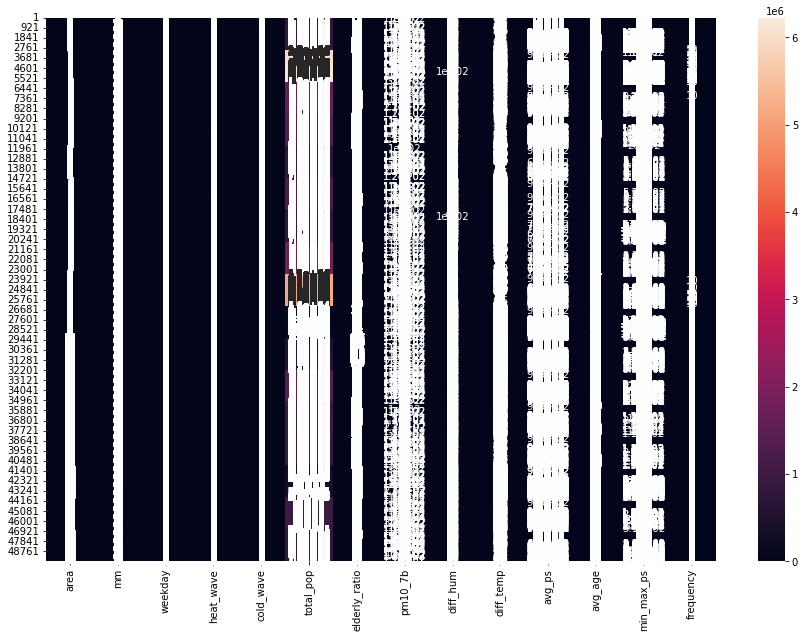

In [46]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(female[f_cols], annot=True)

## Male

In [22]:
# bias를 위한 상수항 추가
m_data = sm.add_constant(male, has_constant = "add")
m_data

X_male = m_data.drop(['tma','D/R','frequency', 'sex'], axis=1)
y_male = m_data['frequency']

In [23]:
m_cols =  ['area','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
           'pm10_7b','diff_hum','diff_temp','avg_ps',
          'avg_age','min_max_ps', 'avg_hum','frequency']

In [24]:
male_model = sm.OLS.from_formula("frequency ~ " + "+".join(m_data[m_cols].drop(['frequency'], axis=1).columns), data=m_data)
male_result = male_model.fit()

male_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              frequency   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1465.
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:19:19   Log-Likelihood:                -40790.
No. Observations:               24837   AIC:                         8.161e+04
Df Residuals:                   24822   BIC:                         8.173e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.1516      0.469     -8.858      0.000      -5.070      -3.233
area             -0.0196      0.002    -10.601      0.000      -0.023      -0.016
mm               -0.0039      0.003     -1.572      0.116      -0.009       0.001
weekday          -0.0952      0.004    -23.972      0.000      -0.103      -0.087
heat_wave         0.0339      0.033      1.024      0.306      -0.031       0.099
cold_wave         0.0201      0.043      0.462      0.644      -0.065       0.105
total_pop      6.964e-07   5.79e-09    120.297      0.000    6.85e-07    7.08e-07
elderly_ratio     0.0139      0.010      1.425      0.154      -0.005       0.033
pm10_7b           0.0003      0.000      0.936      0.350      -0.000       0.001
diff_hum          0.0015      0.001      1.861      0.063   -8.03e-05       0.003
diff_temp         0.0018      0.003      0.622      0.534      -0.004       0.008
avg_ps            0.0002      0.000      2.078      0.038    1.38e-05       0.000
avg_age           0.1154      0.014      8.320      0.000       0.088       0.143
min_max_ps       -0.0002      0.000     -1.783      0.075      -0.000    1.79e-05
avg_hum           0.0007      0.001      1.009      0.313      -0.001       0.002
==============================================================================
Omnibus:                     4226.561   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11400.413
Skew:                           0.926   Prob(JB):                         0.00
Kurtosis:                       5.755   Cond. No.                     1.28e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# 범주형변수 처리
m_feature = m_data[m_cols].drop(['frequency','area','mm','weekday','heat_wave','cold_wave'], axis=1).columns

# ['area','mm','weekday','heat_wave','cold_wave','total_pop','elderly_ratio',
#            'pm10_7b','diff_hum','diff_temp','avg_ps',
#           'avg_age','min_max_ps', 'avg_hum','frequency']
m_feature_nms = [name for name in m_feature] + ["C(area)", "C(mm)","C(weekday)","C(heat_wave)","C(cold_wave)"]
# feature_nms

male_model2  = sm.OLS.from_formula("frequency ~ 0 + " + "+".join(m_feature_nms), data=m_data)
male_result2 = male_model2.fit()

male_result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              frequency   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     465.4
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:20:48   Log-Likelihood:                -40538.
No. Observations:               24837   AIC:                         8.117e+04
Df Residuals:                   24790   BIC:                         8.155e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(area)[0]            0.2559      0.886      0.289      0.773      -1.481       1.993
C(area)[1]            2.7294      2.230      1.224      0.221      -1.642       7.101
C(area)[2]            1.0042      0.993      1.012      0.312      -0.942       2.950
C(area)[3]            0.9010      0.937      0.962      0.336      -0.936       2.737
C(area)[4]           -0.0802      0.878     -0.091      0.927      -1.802       1.642
C(area)[5]            0.2268      0.943      0.240      0.810      -1.622       2.076
C(area)[6]           -0.0521      0.903     -0.058      0.954      -1.821       1.717
C(area)[7]            0.7973      1.018      0.783      0.433      -1.197       2.792
C(area)[8]            1.9054      1.861      1.024      0.306      -1.742       5.553
C(area)[9]           -0.5886      0.873     -0.674      0.500      -2.300       1.123
C(area)[10]          -0.2192      0.931     -0.235      0.814      -2.045       1.606
C(area)[11]           0.1728      0.978      0.177      0.860      -1.745       2.091
C(area)[12]           0.4666      0.876      0.533      0.594      -1.250       2.183
C(area)[13]           0.2683      0.879      0.305      0.760      -1.455       1.992
C(area)[14]          -0.4164      0.872     -0.477      0.633      -2.126       1.294
C(area)[15]           0.2031      0.889      0.228      0.819      -1.540       1.946
C(area)[16]           0.1844      0.889      0.207      0.836      -1.558       1.926
C(mm)[T.2]           -0.0140      0.039     -0.356      0.721      -0.091       0.063
C(mm)[T.3]           -0.0283      0.039     -0.724      0.469      -0.105       0.048
C(mm)[T.4]           -0.0062      0.040     -0.156      0.876      -0.084       0.072
C(mm)[T.5]           -0.0624      0.040     -1.565      0.118      -0.141       0.016
C(mm)[T.6]           -0.0378      0.040     -0.937      0.349      -0.117       0.041
C(mm)[T.7]            0.0005      0.043      0.012      0.990      -0.084       0.085
C(mm)[T.8]           -0.0723      0.044     -1.637      0.102      -0.159       0.014
C(mm)[T.9]           -0.0570      0.042     -1.356      0.175      -0.139       0.025
C(mm)[T.10]          -0.0553      0.041     -1.351      0.177      -0.136       0.025
C(mm)[T.11]           0.0112      0.040      0.279      0.780      -0.067       0.090
C(mm)[T.12]          -0.0154      0.039     -0.392      0.695      -0.092       0.061
C(weekday)[T.1]      -0.1983      0.029     -6.741      0.000      -0.256      -0.141
C(weekday)[T.2]      -0.2077      0.029     -7.062      0.000      -0.265      -0.150
C(weekday)[T.3]      -0.2822      0.029     -9.593      0.000      -0.340      -0.225
C(weekday)[T.4]      -0.3376      0.029    -11.463      0.000      -0.395      -0.280
C(weekday)[T.5]      -0.5770      0.029    -19.591      0.000      -0.635

In [26]:
X_male.columns

Index(['const', 'area', 'yyyy', 'mm', 'dd', 'weekday', 'sum_gsr', 'sum_rn',
       'avg_ps', 'max_ps', 'min_ps', 'so2', 'o3', 'pm10', 'elderly_pop',
       'total_pop', 'elderly_ratio', 'avg_age', 'min_max_ps', 'heat_wave',
       'cold_wave', 'min_hum', 'max_hum', 'avg_hum', 'diff_hum', 'min_temp',
       'max_temp', 'avg_temp', 'diff_temp', 'pm10_3b', 'pm10_7b', 'pm10_31b'],
      dtype='object')

In [32]:
m_cols2 = ['area', 'mm', 'weekday', 'heat_wave', 'cold_wave', 'total_pop', 'elderly_ratio', 'pm10_7b', 'diff_hum', 'diff_temp', 'avg_age', 'min_max_ps', 'avg_hum']
# 'avg_ps', 

In [29]:
print(m_cols)

['area', 'mm', 'weekday', 'heat_wave', 'cold_wave', 'total_pop', 'elderly_ratio', 'pm10_7b', 'diff_hum', 'diff_temp', 'avg_ps', 'avg_age', 'min_max_ps', 'avg_hum', 'frequency']


In [33]:
# DataFrame 내 숫자 정수표현 설정
pd.options.display.float_format = '{:.4f}'.format
# pd.reset_option('display.float_format') # 재설정(reset)

# VIF를 통한 다중공선성 확인

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_male[m_cols2].values, i) for i in range(X_male[m_cols2].shape[1])]
vif["features"] = X_male[m_cols2].columns
vif.sort_values('VIF Factor')

,VIF Factor,features
3,1.0414,heat_wave
4,1.0529,cold_wave
11,1.1710,min_max_ps
5,2.4281,total_pop
2,3.2525,weekday
0,4.6196,area
7,5.0324,pm10_7b
1,5.3855,mm
9,21.8377,diff_temp
8,28.6444,diff_hum
